# Training an image set to recognize the Devils face on Canadian Banknotes 1954

# URL: https://www.youtube.com/watch?v=CzPYgRaYWUA 





In [29]:
#importing the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
#importing the required packages
from fastai.vision import *
from fastai.metrics import error_rate

In [46]:
cd /content/drive/MyDrive/Banknote-App


/content/drive/MyDrive/Banknote-App


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

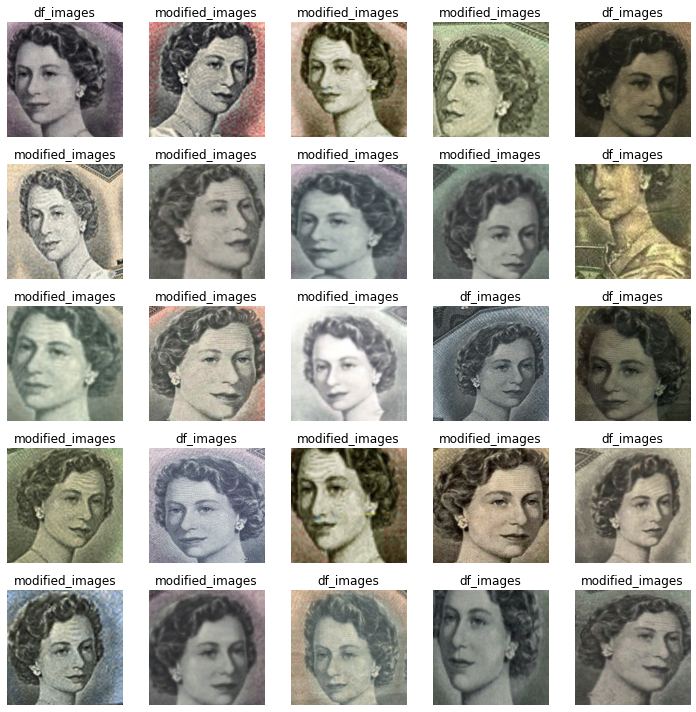

In [79]:
#view data
data = ImageDataBunch.from_folder(path, train='.', valid_pct = 0.8, seed=8,
                                  ds_tfms = get_transforms(), size = 200).normalize(imagenet_stats)
data.show_batch(rows = 5, figsize = (10,10))

In [80]:
print(data.classes)
print(len(data.train_ds))
print(len(data.valid_ds))

['df_images', 'modified_images']
68
269


### Training Data Set

In [81]:
learn = cnn_learner(data, models.resnet34, metrics = error_rate)


In [82]:
learn.fit_one_cycle(12)


epoch,train_loss,valid_loss,error_rate,time
0,1.117336,1.110627,0.449814,00:41
1,1.219978,0.823274,0.483271,00:42
2,1.056564,0.860659,0.434944,00:42
3,0.960062,0.923766,0.453532,00:42
4,0.905313,0.697340,0.342007,00:42
5,0.818919,0.472705,0.185874,00:43
6,0.761922,0.428938,0.159851,00:43
7,0.690098,0.427320,0.163569,00:42
8,0.657414,0.436754,0.156134,00:42
9,0.598825,0.443602,0.167286,00:43


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

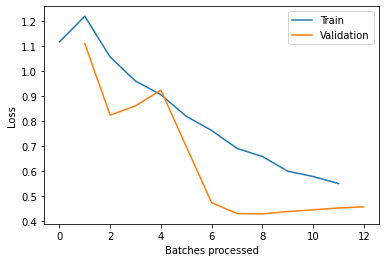

In [83]:
learn.recorder.plot_losses()

In [84]:
learn.save('stage-1')


In [85]:
learn.unfreeze()


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


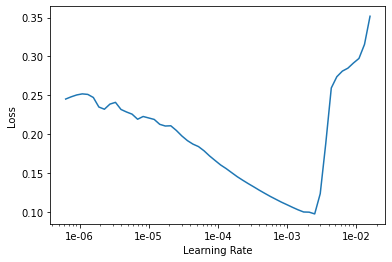

In [86]:
learn.lr_find()
learn.recorder.plot()

In [87]:
learn.fit_one_cycle(3,max_lr=slice(3e-5,3e-4))


epoch,train_loss,valid_loss,error_rate,time
0,0.199327,0.446720,0.171004,00:52
1,0.220772,0.574109,0.156134,00:52
2,0.208077,0.591540,0.156134,00:52


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

In [88]:
learn.save('stage-2')


# Interpretation


In [89]:
learn.load('stage-1');


In [90]:
interp = ClassificationInterpretation.from_learner(learn)


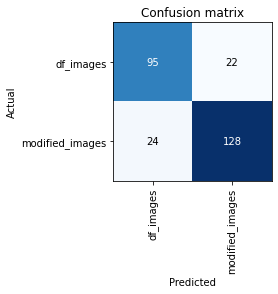

In [91]:
interp.plot_confusion_matrix()


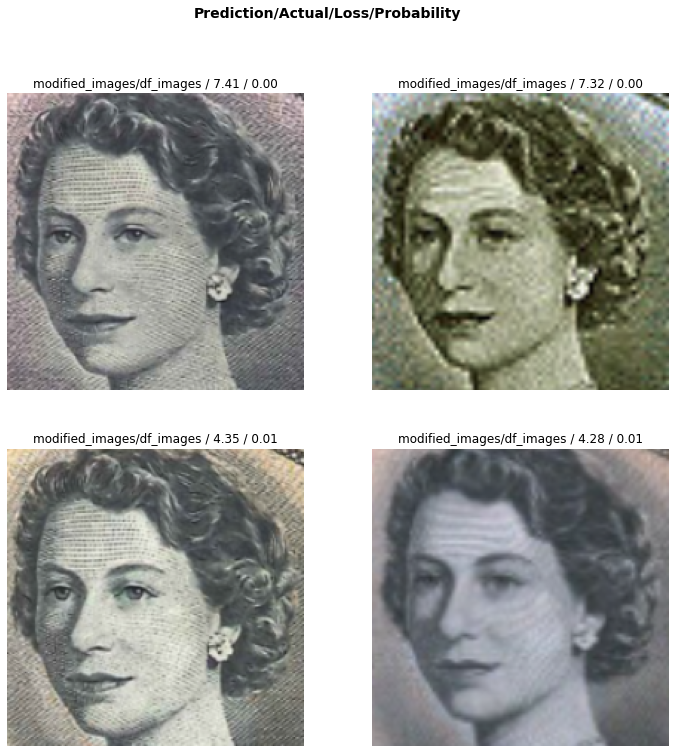

In [92]:
interp.plot_top_losses(k = 4, heatmap=False)


# Prediction


In [93]:
defaults.device = torch.device('cpu')


In [94]:
learn.export()


In [ ]:
#example image
img = open_image(path/'.')
img

In [76]:
learn = load_learner(path)


In [77]:
pred,idx,outputs = learn.predict(img)
print('Predicted class: ',pred)

Predicted class:  df_images
